In [42]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split

%config InlineBackend.figure_format='svg'

In [43]:
df=pd.read_csv('train_Data.csv')

In [44]:
df.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='object')

In [45]:
df_min=df[df['9']==1]

In [46]:
df_min.to_csv('glass1_minority_train.csv',index=False)
df_min=pd.read_csv('glass1_minority_train.csv')

In [47]:
df_majority=df[df['9']==0]
df_majority.to_csv('glass1_majority_train.csv',index=False)
df_majority=pd.read_csv('glass1_majority_train.csv')

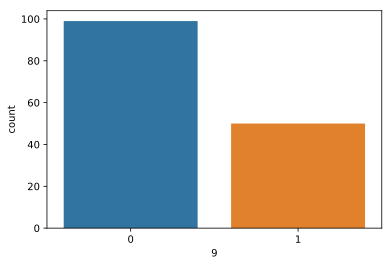

In [48]:
%matplotlib inline
sns.countplot(x='9',data=df)

In [49]:
def create_dataset(dataset,look_back=1):
    
    datax,datay=[],[]
    
    for i in range(len(dataset)-look_back-1):
        a=dataset[i:(i+look_back),:]
        datax.append(a)
        datay.append(dataset[i+look_back,:])
    
    return np.array(datax),np.array(datay)

In [50]:
df_minor=np.array(df_min)
scaler=MinMaxScaler(feature_range=(0,1))

df_minor=scaler.fit_transform(df_min)

x,y=create_dataset(df_minor,5)#5
print(x.shape)
print(y.shape)

(44, 5, 10)
(44, 10)


In [51]:
Xtrain,xtest,Ytrain,ytest=train_test_split(x,y,test_size=0.40,random_state=60)

In [52]:
model=Sequential()
model.add(LSTM(20,input_shape=(Xtrain.shape[1],Xtrain.shape[2])))#5
model.add(Dense(10))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 20)                2480      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                210       
Total params: 2,690
Trainable params: 2,690
Non-trainable params: 0
_________________________________________________________________
None


In [53]:
model.compile(loss='mse',optimizer='adam')

In [54]:
history=model.fit(Xtrain,Ytrain,epochs=500,verbose=1)

Epoch 1/500
26/26 [==============================] - 1s 43ms/step - loss: 0.2590
Epoch 2/500
26/26 [==============================] - 0s 616us/step - loss: 0.2535
Epoch 3/500
26/26 [==============================] - 0s 733us/step - loss: 0.2473
Epoch 4/500
26/26 [==============================] - 0s 758us/step - loss: 0.2409
Epoch 5/500
26/26 [==============================] - 0s 790us/step - loss: 0.2345
Epoch 6/500
26/26 [==============================] - 0s 810us/step - loss: 0.2281
Epoch 7/500
26/26 [==============================] - 0s 771us/step - loss: 0.2219
Epoch 8/500
26/26 [==============================] - 0s 829us/step - loss: 0.2157
Epoch 9/500
26/26 [==============================] - 0s 771us/step - loss: 0.2097
Epoch 10/500
26/26 [==============================] - 0s 810us/step - loss: 0.2038
Epoch 11/500
26/26 [==============================] - 0s 906us/step - loss: 0.1980
Epoch 12/500
26/26 [==============================] - 0s 906us/step - loss: 0.1924
Epoch 13/500
2

Epoch 100/500
26/26 [==============================] - 0s 656us/step - loss: 0.0441
Epoch 101/500
26/26 [==============================] - 0s 771us/step - loss: 0.0441
Epoch 102/500
26/26 [==============================] - 0s 771us/step - loss: 0.0440
Epoch 103/500
26/26 [==============================] - 0s 1ms/step - loss: 0.0440
Epoch 104/500
26/26 [==============================] - 0s 791us/step - loss: 0.0440
Epoch 105/500
26/26 [==============================] - 0s 848us/step - loss: 0.0439
Epoch 106/500
26/26 [==============================] - 0s 906us/step - loss: 0.0439
Epoch 107/500
26/26 [==============================] - 0s 829us/step - loss: 0.0439
Epoch 108/500
26/26 [==============================] - 0s 829us/step - loss: 0.0438
Epoch 109/500
26/26 [==============================] - 0s 868us/step - loss: 0.0438
Epoch 110/500
26/26 [==============================] - 0s 771us/step - loss: 0.0438
Epoch 111/500
26/26 [==============================] - 0s 868us/step - loss: 0

Epoch 198/500
26/26 [==============================] - 0s 694us/step - loss: 0.0413
Epoch 199/500
26/26 [==============================] - 0s 848us/step - loss: 0.0412
Epoch 200/500
26/26 [==============================] - 0s 617us/step - loss: 0.0412
Epoch 201/500
26/26 [==============================] - 0s 887us/step - loss: 0.0412
Epoch 202/500
26/26 [==============================] - 0s 982us/step - loss: 0.0411
Epoch 203/500
26/26 [==============================] - 0s 810us/step - loss: 0.0411
Epoch 204/500
26/26 [==============================] - 0s 964us/step - loss: 0.0411
Epoch 205/500
26/26 [==============================] - 0s 829us/step - loss: 0.0411
Epoch 206/500
26/26 [==============================] - 0s 1ms/step - loss: 0.0410
Epoch 207/500
26/26 [==============================] - 0s 848us/step - loss: 0.0410
Epoch 208/500
26/26 [==============================] - 0s 829us/step - loss: 0.0410
Epoch 209/500
26/26 [==============================] - 0s 848us/step - loss: 0

Epoch 296/500
26/26 [==============================] - 0s 790us/step - loss: 0.0368
Epoch 297/500
26/26 [==============================] - 0s 636us/step - loss: 0.0367
Epoch 298/500
26/26 [==============================] - 0s 675us/step - loss: 0.0367
Epoch 299/500
26/26 [==============================] - 0s 1ms/step - loss: 0.0366
Epoch 300/500
26/26 [==============================] - 0s 1ms/step - loss: 0.0365
Epoch 301/500
26/26 [==============================] - 0s 964us/step - loss: 0.0365
Epoch 302/500
26/26 [==============================] - 0s 868us/step - loss: 0.0364
Epoch 303/500
26/26 [==============================] - 0s 848us/step - loss: 0.0363
Epoch 304/500
26/26 [==============================] - 0s 925us/step - loss: 0.0362
Epoch 305/500
26/26 [==============================] - 0s 906us/step - loss: 0.0362
Epoch 306/500
26/26 [==============================] - 0s 887us/step - loss: 0.0361
Epoch 307/500
26/26 [==============================] - 0s 791us/step - loss: 0.0

Epoch 394/500
26/26 [==============================] - 0s 810us/step - loss: 0.0284
Epoch 395/500
26/26 [==============================] - 0s 810us/step - loss: 0.0283
Epoch 396/500
26/26 [==============================] - 0s 733us/step - loss: 0.0282
Epoch 397/500
26/26 [==============================] - 0s 914us/step - loss: 0.0281
Epoch 398/500
26/26 [==============================] - 0s 964us/step - loss: 0.0281
Epoch 399/500
26/26 [==============================] - 0s 829us/step - loss: 0.0280
Epoch 400/500
26/26 [==============================] - 0s 792us/step - loss: 0.0279
Epoch 401/500
26/26 [==============================] - 0s 848us/step - loss: 0.0278
Epoch 402/500
26/26 [==============================] - 0s 906us/step - loss: 0.0277
Epoch 403/500
26/26 [==============================] - 0s 926us/step - loss: 0.0276
Epoch 404/500
26/26 [==============================] - 0s 906us/step - loss: 0.0276
Epoch 405/500
26/26 [==============================] - 0s 771us/step - loss:

Epoch 492/500
26/26 [==============================] - 0s 849us/step - loss: 0.0205
Epoch 493/500
26/26 [==============================] - 0s 733us/step - loss: 0.0204
Epoch 494/500
26/26 [==============================] - 0s 887us/step - loss: 0.0203
Epoch 495/500
26/26 [==============================] - 0s 810us/step - loss: 0.0203
Epoch 496/500
26/26 [==============================] - 0s 932us/step - loss: 0.0202
Epoch 497/500
26/26 [==============================] - 0s 906us/step - loss: 0.0201
Epoch 498/500
26/26 [==============================] - 0s 926us/step - loss: 0.0201
Epoch 499/500
26/26 [==============================] - 0s 1ms/step - loss: 0.0200
Epoch 500/500
26/26 [==============================] - 0s 790us/step - loss: 0.0199


In [55]:
model.save('7-24-2019-glass1.h5')

In [56]:
Xtrain.shape

(26, 5, 10)

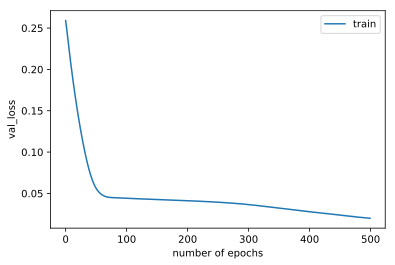

In [57]:
plt.plot(history.history['loss'],label='train')
#plt.plot(history.history['val_loss'],label='test')
plt.xlabel('number of epochs')
plt.ylabel('val_loss')
plt.legend()
#pyplot.savefig('LSTM training.png',dpi=300)
plt.show()

In [58]:
prediction=model.predict(xtest)

In [59]:
def draw_prediction(ytest,d,columns):
    
    _,axes=plt.subplots(len(columns),1,figsize=(10,20))
    
    for i,cols in enumerate(columns):
        
        axes[i].plot(ytest[:,i],label='real',color='blue')
        axes[i].plot(d[:,i],label='prediction',color='orange')
        #axes[i].set_xlabel='index'
        #axes[i].set_ylabel=cols
        axes[i].xlabel='index'
        axes[i].ylabel=cols

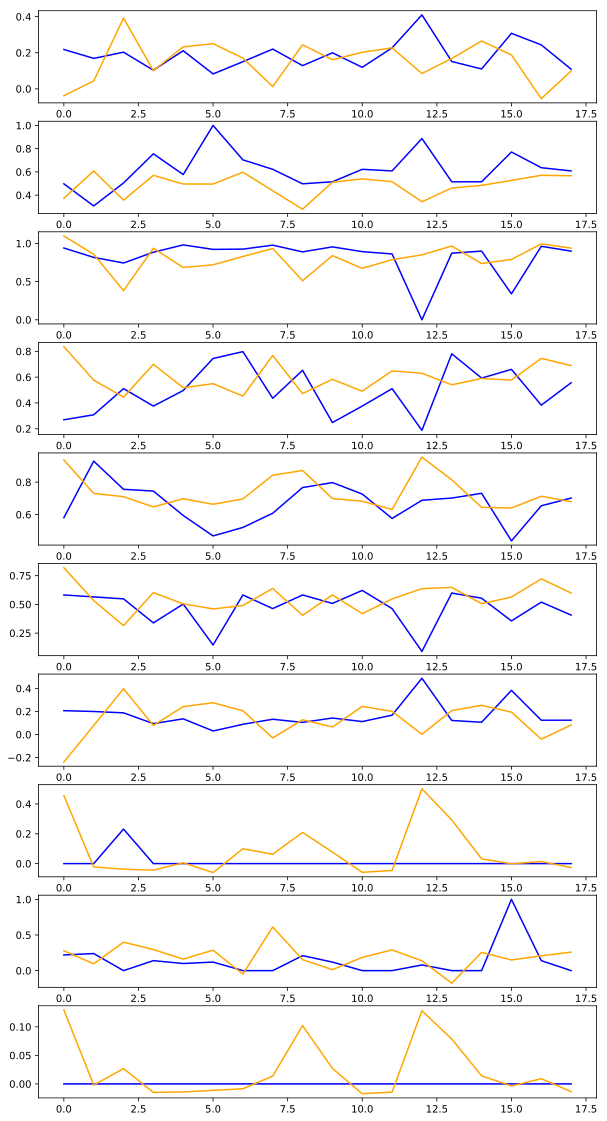

In [60]:
clmns=df.columns
draw_prediction(ytest,prediction,clmns)

In [61]:
prediction

array([[-0.03789902,  0.37234703,  1.0972472 ,  0.8367778 ,  0.9366886 ,
         0.8191877 , -0.23860312,  0.4569545 ,  0.27996504,  0.12958127],
       [ 0.04380127,  0.60786176,  0.8579831 ,  0.5771382 ,  0.730562  ,
         0.5337002 ,  0.07832244, -0.02227888,  0.09558444, -0.00203632],
       [ 0.39211637,  0.35635415,  0.3819486 ,  0.44513273,  0.7103602 ,
         0.31515446,  0.3967441 , -0.03718224,  0.39894733,  0.02686065],
       [ 0.10085642,  0.5702803 ,  0.9365267 ,  0.69951314,  0.6474743 ,
         0.6022949 ,  0.07879847, -0.04386471,  0.2963152 , -0.01493268],
       [ 0.23267946,  0.4955916 ,  0.68495584,  0.51828706,  0.6976708 ,
         0.50452703,  0.24204838,  0.005571  ,  0.16196035, -0.01413091],
       [ 0.2502069 ,  0.4953932 ,  0.7199521 ,  0.54925406,  0.66364664,
         0.46071237,  0.2753325 , -0.06018302,  0.28687826, -0.01133482],
       [ 0.1704663 ,  0.5977064 ,  0.8292066 ,  0.4531782 ,  0.6964227 ,
         0.49029908,  0.20574604,  0.099392  

In [62]:
prediction2=scaler.inverse_transform(prediction)

In [63]:
ytest2=scaler.inverse_transform(ytest)

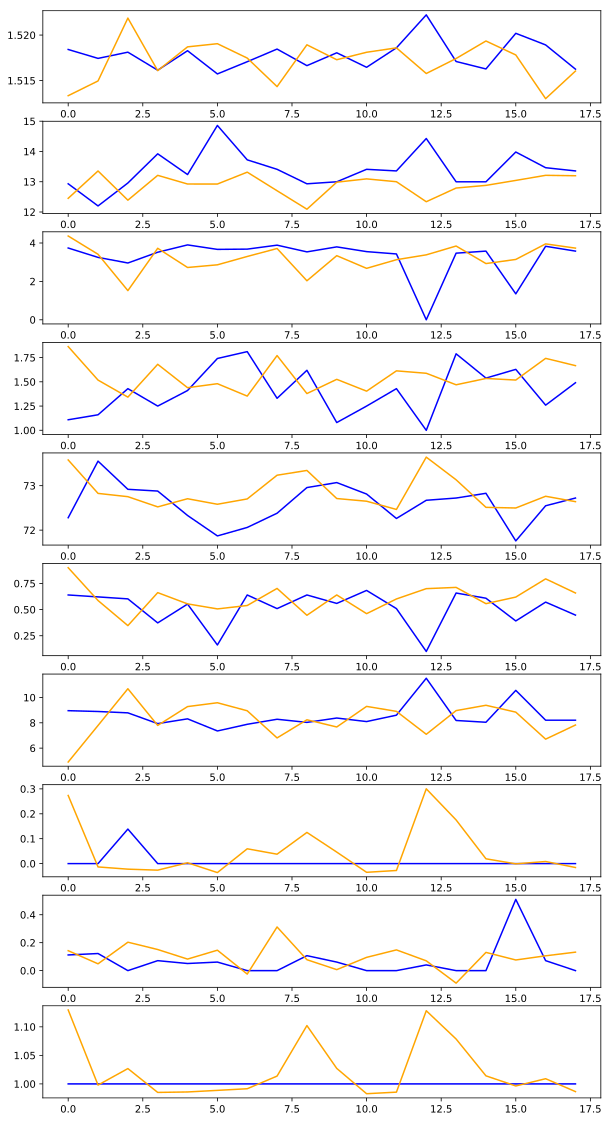

In [64]:
draw_prediction(ytest2,prediction2,clmns)

In [65]:
prediction

array([[-0.03789902,  0.37234703,  1.0972472 ,  0.8367778 ,  0.9366886 ,
         0.8191877 , -0.23860312,  0.4569545 ,  0.27996504,  0.12958127],
       [ 0.04380127,  0.60786176,  0.8579831 ,  0.5771382 ,  0.730562  ,
         0.5337002 ,  0.07832244, -0.02227888,  0.09558444, -0.00203632],
       [ 0.39211637,  0.35635415,  0.3819486 ,  0.44513273,  0.7103602 ,
         0.31515446,  0.3967441 , -0.03718224,  0.39894733,  0.02686065],
       [ 0.10085642,  0.5702803 ,  0.9365267 ,  0.69951314,  0.6474743 ,
         0.6022949 ,  0.07879847, -0.04386471,  0.2963152 , -0.01493268],
       [ 0.23267946,  0.4955916 ,  0.68495584,  0.51828706,  0.6976708 ,
         0.50452703,  0.24204838,  0.005571  ,  0.16196035, -0.01413091],
       [ 0.2502069 ,  0.4953932 ,  0.7199521 ,  0.54925406,  0.66364664,
         0.46071237,  0.2753325 , -0.06018302,  0.28687826, -0.01133482],
       [ 0.1704663 ,  0.5977064 ,  0.8292066 ,  0.4531782 ,  0.6964227 ,
         0.49029908,  0.20574604,  0.099392  

In [66]:
new_data=pd.DataFrame(prediction2)

In [67]:
new_data.to_csv('new_corrected_data-v1-7-24-2019.csv',index=False)